In [2]:
library('igraph')
library('Matrix')
library('pracma')

In [3]:
load("./g1000.RData")

In [4]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

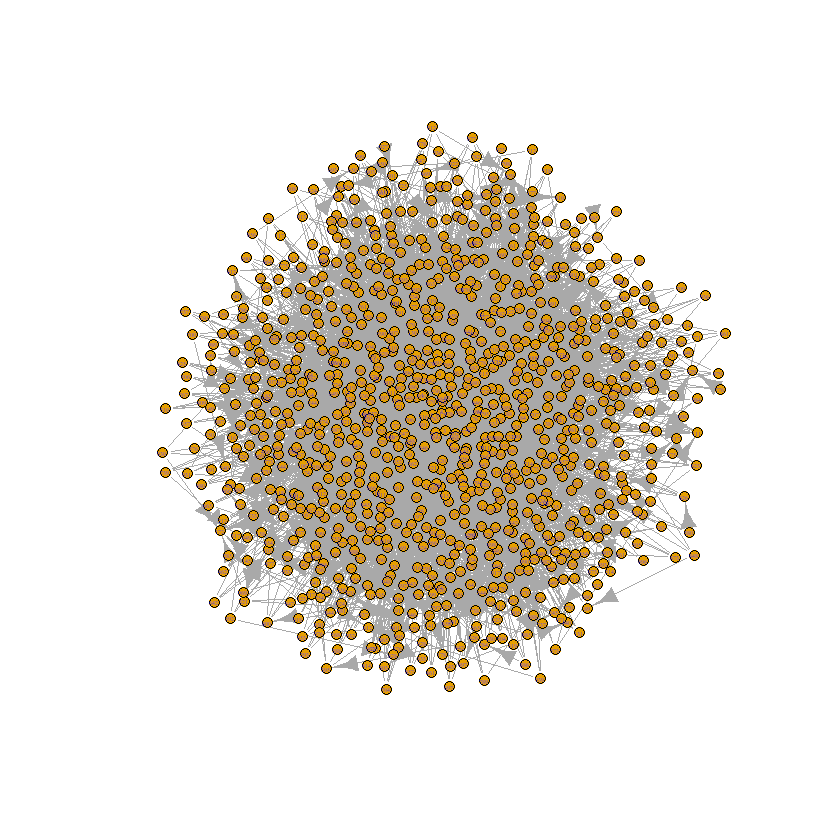

In [96]:
set.seed(1)
g7 = sample_pa(1000, m=4, directed=T)
plot(g7,vertex.size=4, vertex.label.cex=0.3)

tm7 = create_transition_matrix(g7)
num_steps = 100
record = rep(0, vcount(g7))
for (vstart in sample(1:vcount(g7), 100)){
    v = vstart
    for(i in 1:num_steps){
        # fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        record[v] = record[v] + 1
        PMF = tm7[v, ]
        v = sample(1:vcount(g7), 1, prob = PMF)        
    }
}

In [92]:
print(degree(g7)[1])

[1] 270


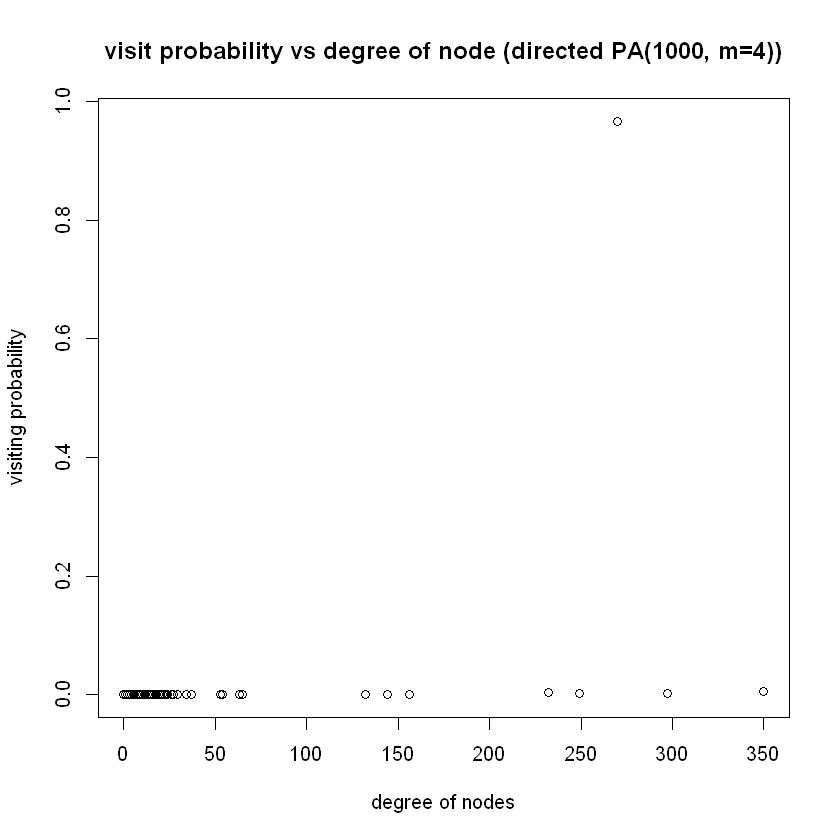

In [89]:
plot(degree(g7, mode='in'), record/num_steps/1000, main="visit probability vs degree of node (directed PA(1000, m=4))", xlab="degree of nodes", ylab="visiting probability")

**b.**

In [98]:
test1 = page_rank(g7, vids = V(g7),
  directed = TRUE, damping=0.85, personalized = NULL, weights = NULL,
  options = NULL)

In [99]:
record = rep(0, vcount(g7))
alpha = 0.15
tm7_1 = tm7*(1-alpha) + alpha/vcount(g7)*ones(vcount(g7))
for (vstart in sample(1:vcount(g7), 100, replace=TRUE)){
    v = vstart
    for(i in 1:num_steps){
        record[v] = record[v] + 1
        PMF = tm7_1[v, ]
        v = sample(1:vcount(g7), 1, prob = PMF)
    }
}

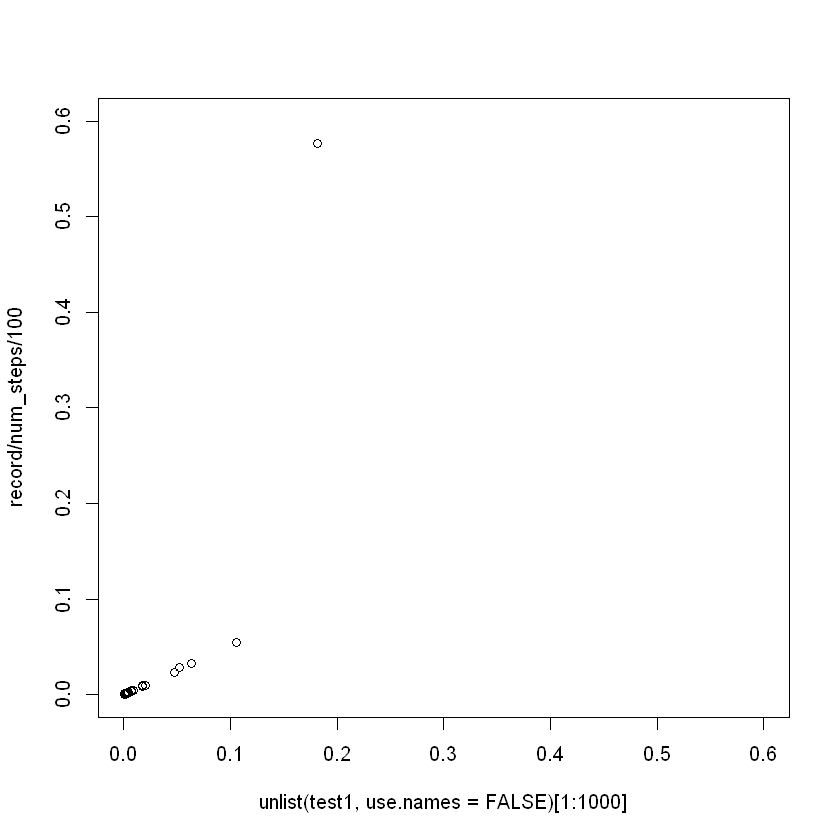

In [100]:
# verification using builtin page rank function
plot(unlist(test1, use.names=FALSE)[1:1000], record/num_steps/100, xlim=c(0,0.6), ylim=c(0,0.6))

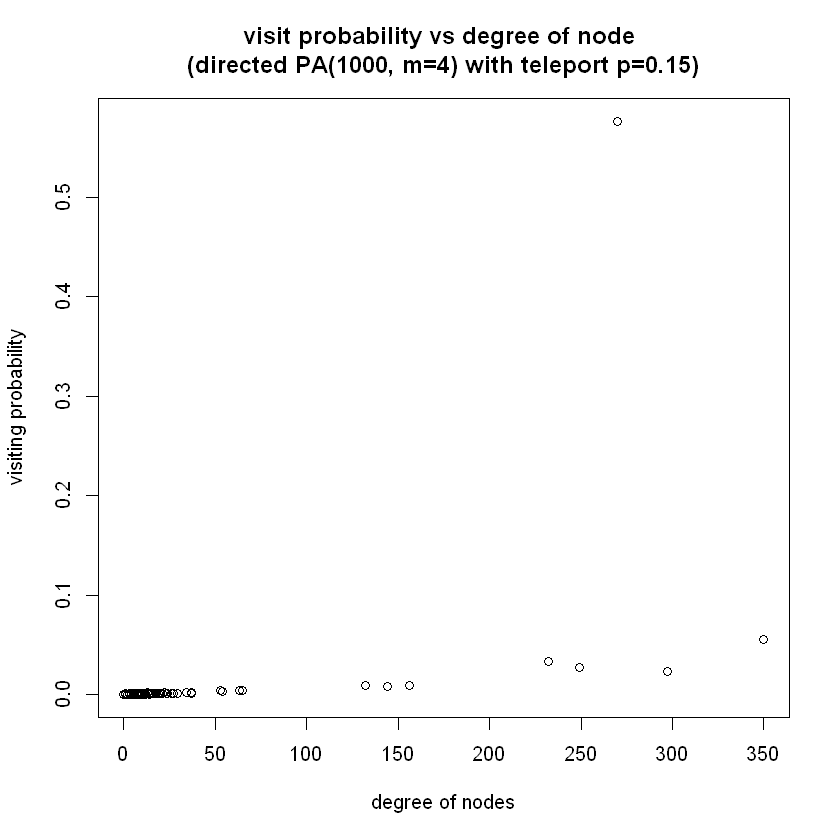

In [72]:
plot(degree(g7, mode='in'), record/num_steps/100, main="visit probability vs degree of node \n(directed PA(1000, m=4) with teleport p=0.15)", xlab="degree of nodes", ylab="visiting probability")

### 4

In [54]:
record = rep(0, vcount(g7))
alpha = 0.15
tm7_2 = tm7*(1-alpha) + 0.15*diag(vcount(g7))

for (vstart in sample(1:vcount(g7), 100)){
    v = vstart
    for(i in 1:num_steps){
        record[v] = record[v] + 1
        PMF = tm7_2[v, ]
        v = sample(1:vcount(g7), 1, prob = PMF)
    }
}


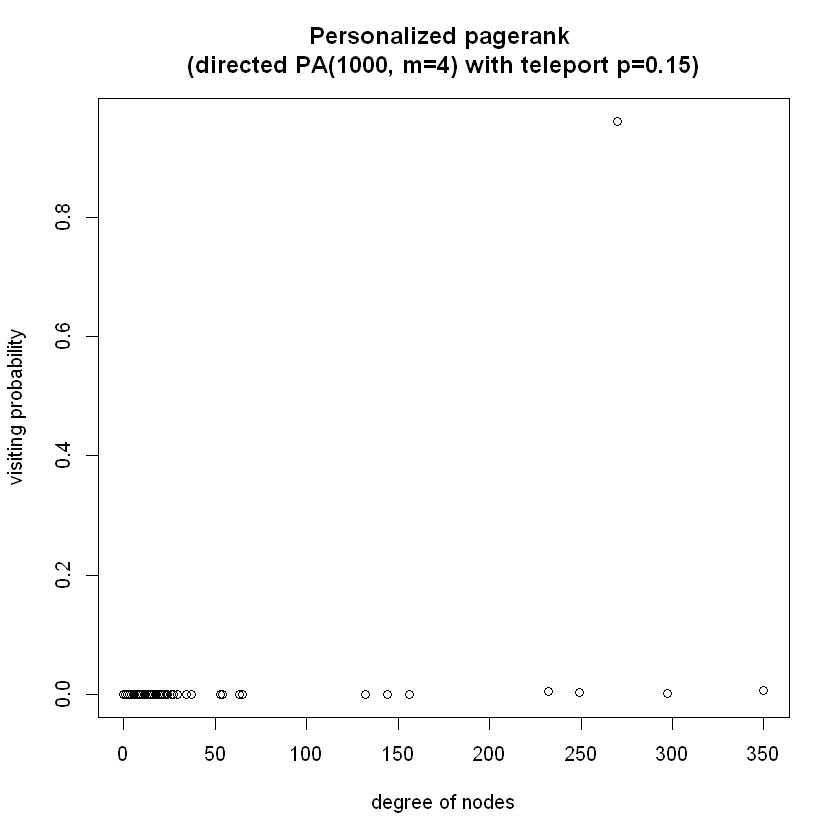

In [57]:
plot(degree(g7, mode='in'), record/num_steps/100, main="Personalized pagerank \n(directed PA(1000, m=4) with teleport p=0.15)", xlab="degree of nodes", ylab="visiting probability")

**b.**

In [36]:
two_med = order(pageprob)[500:501]

[1] 986 987
[1] 4 4


In [85]:
A = diag(vcount(g7))-(1-alpha)*tm7
b = rep(0, vcount(g7))
b[two_med] = 0.5*alpha
pagerank = solve(A, b)

   [1] 0.1718535797 0.0950144975 0.0611421938 0.0455696356 0.0489128960
   [6] 0.0281952278 0.0031647446 0.0096460386 0.0267948855 0.0049828042
  [11] 0.0087246084 0.0007048932 0.0057024219 0.0015504153 0.0016294627
  [16] 0.0014068584 0.0010480102 0.0003476079 0.0004372843 0.0002359442
  [21] 0.0005621563 0.0177731732 0.0067973397 0.0002457949 0.0006751092
  [26] 0.0008293211 0.0003078770 0.0003783924 0.0012528096 0.0055397007
  [31] 0.0005726336 0.0039924815 0.0004085470 0.0009133197 0.0004386375
  [36] 0.0017600577 0.0007931027 0.0014025924 0.0002081576 0.0001975452
  [41] 0.0004373520 0.0002758502 0.0003158256 0.0018147409 0.0004670623
  [46] 0.0003779571 0.0002768360 0.0011045801 0.0003649726 0.0015913857
  [51] 0.0046332393 0.0010076141 0.0002496366 0.0009980466 0.0001460755
  [56] 0.0004071453 0.0002625131 0.0005092088 0.0007854682 0.0002147539
  [61] 0.0005964134 0.0005066727 0.0003455143 0.0001460755 0.0018079358
  [66] 0.0002557903 0.0003858018 0.0006464593 0.0038369383 0.000

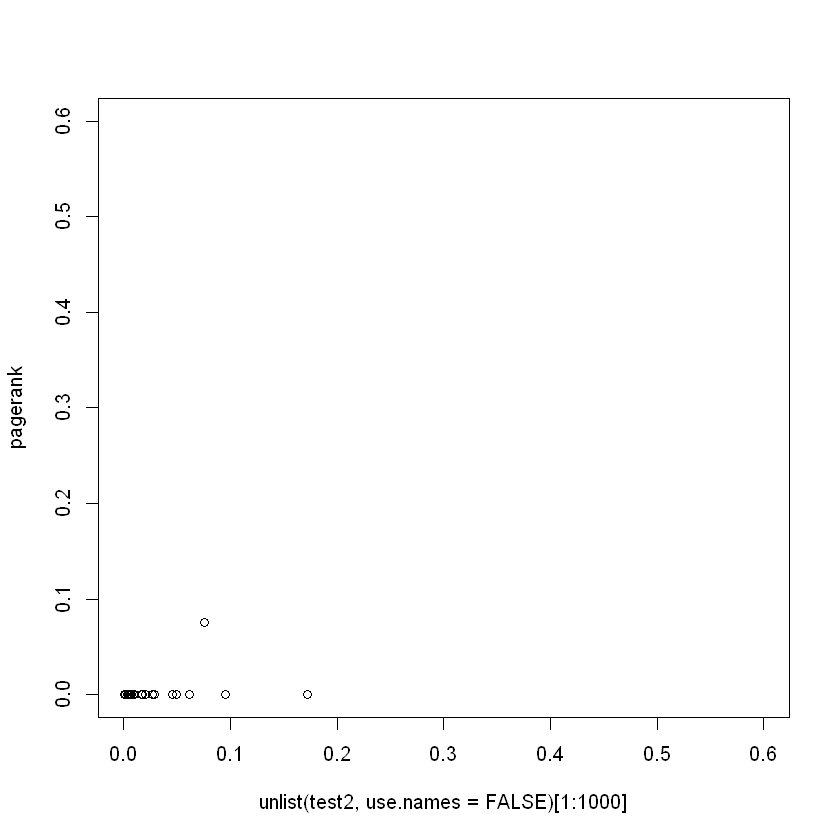

In [87]:
# verification using builtin page rank function
test2 = page_rank(g7, vids = V(g7),
  directed = TRUE, personalized = b, weights = NULL,
  options = NULL)

print(unlist(test2, use.names=FALSE))
plot(unlist(test2, use.names=FALSE)[1:1000], pagerank, xlim=c(0,0.6), ylim=c(0,0.6))

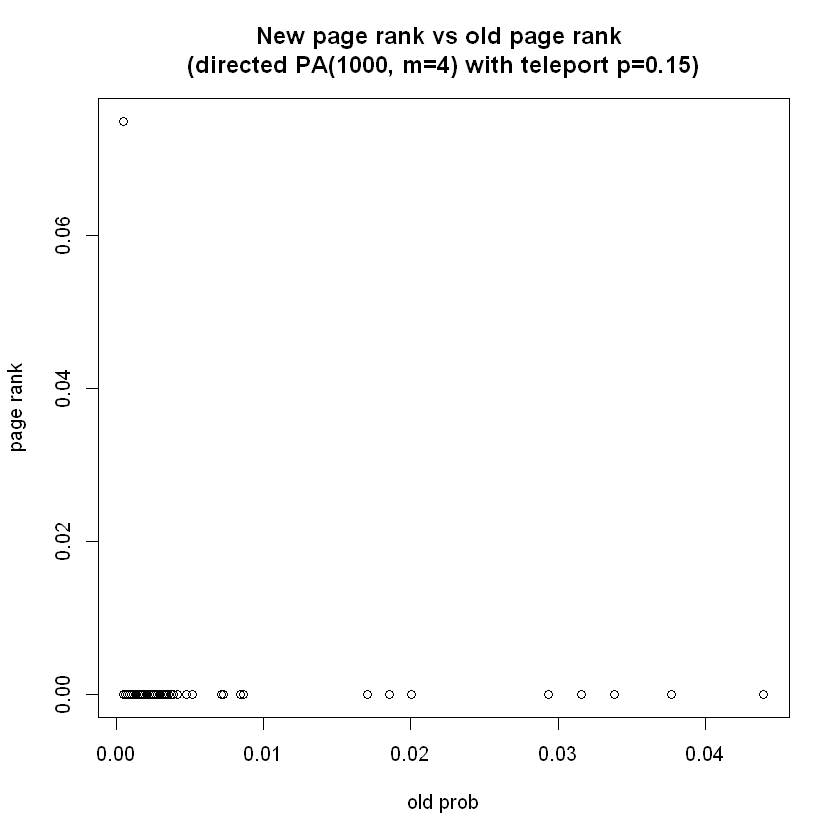

In [66]:
plot(pageprob, pagerank, 
     main="New page rank vs old page rank \n(directed PA(1000, m=4) with teleport p=0.15)", xlab="old prob", ylab="page rank")

**c.**

$$ P = \begin{bmatrix} \vdots \\ 0.5 \\ 0.5 \\ \vdots \end{bmatrix} \times 0.15+0.85 \times M\times P$$
where $P$ is pagerank and $M$ is the transition matrix

$$(I-0.85M)P = \begin{bmatrix} \vdots \\ 0.5 \\ 0.5 \\ \vdots \end{bmatrix} \times 0.15 $$
we may find $P$ by solving this equaiton